In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


Growth: Identify year over year growth

In [2]:
# Group data by year
year_view = avocado_data.groupby(["Year"])

# Calculations for analysis
#total_sales = year_view["Total Sales"].sum()/1000000
total_volume = year_view["Total Volume"].sum()/1000000

# YoY Analysis data frame
YOY_df = pd.DataFrame({
  #  "Total Sales ($)": total_sales,
    "Total Volume (in millions)": total_volume,
    })

YOY_df.head()

,Total Volume (in millions)
Year,
2015,2728.213441
2016,3001.730749
2017,3069.612136
2018,859.106086


In [3]:
YOY_df.dtypes

Total Volume (in millions)    float64
dtype: object

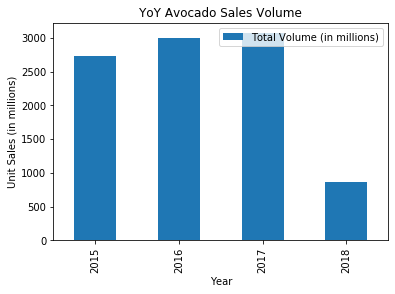

In [4]:
# Generate a bar plot showing YoY trends
YOY_df.plot(kind ="bar", title = "YoY Avocado Sales Volume")

# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")

# Show pandas bar plot
plt.show()

In [5]:
# Formatting data frame
YOY_df = YOY_df.round(2)
#YOY_df["Total Sales ($)"] = YOY_df["Total Sales ($)"].map("${:,}".format)
YOY_df["Total Volume (in millions)"] = YOY_df["Total Volume (in millions)"].map("{:,}".format)

# Display dataframe
YOY_df.sort_values(by = ["Year"], ascending=False)

,Total Volume (in millions)
Year,
2018,859.11
2017,"3,069.61"
2016,"3,001.73"
2015,"2,728.21"


In [6]:
YOY_df.dtypes

Total Volume (in millions)    object
dtype: object

Seasonality: Identify month over month trends.

In [7]:
# Isolate needed columns for MoM trending
MoM_avo = avocado_data.loc[:,["Date", "Total Volume", "Total Sales", "Year"]]
MoM_avo.head()

,Date,Total Volume,Total Sales,Year
0,2015-12-27,64236.62,85434.70,2015
1,2015-12-20,54876.98,74083.92,2015
2,2015-12-13,118220.22,109944.80,2015
3,2015-12-06,78992.15,85311.52,2015
4,2015-11-29,51039.60,65330.69,2015


In [8]:
# Add month column and extract month using datetime import
MoM_avo["Month"] = pd.DatetimeIndex(MoM_avo['Date']).month
MoM_avo.head()

,Date,Total Volume,Total Sales,Year,Month
0,2015-12-27,64236.62,85434.70,2015,12
1,2015-12-20,54876.98,74083.92,2015,12
2,2015-12-13,118220.22,109944.80,2015,12
3,2015-12-06,78992.15,85311.52,2015,12
4,2015-11-29,51039.60,65330.69,2015,11


In [9]:
MoM_avo.dtypes

Date             object
Total Volume    float64
Total Sales     float64
Year              int64
Month             int64
dtype: object

In [13]:
# Group data by month
month_view = MoM_avo.groupby(["Month"])

# Calculations for analysis
total_sales = month_view["Total Sales"].sum()/1000000
total_volume = month_view["Total Volume"].sum()/1000000


# YoY Analysis data frame
MoM_df = pd.DataFrame({
 #   "Total Sales ($)": total_sales,
    "Total Volume (in millions)": total_volume,
    })

MoM_df = MoM_df.round(2)
MoM_df

,Total Volume (in millions)
Month,
1,1092.77
2,1094.90
3,1009.31
4,768.01
5,915.54
6,748.17
7,807.08
8,702.07
9,607.70


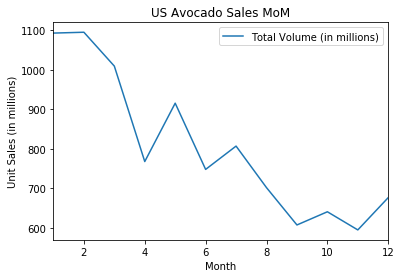

In [18]:
# Create a line chart from grouped MoM_df
MoM_line = MoM_df.plot(kind='line')

# Set the xlabel and ylabel using class methods
MoM_line.set_xlabel("Month")
MoM_line.set_ylabel("Unit Sales (in millions)")
MoM_line.set_title("US Avocado Sales MoM")

# Display MoM line chart
plt.show()

Note: Gap at the last half of the year, price went up.